In [1]:
%matplotlib inline

import glob

import evident
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("./paper.mplstyle")

In [2]:
print(evident.__version__)

0.1.1


In [3]:
col_map = {
    "lung_disease": "Lung Disease",
    "kidney_disease": "Kidney Disease",
    "cardiovascular_disease": "Cardiovascular Disease",
    "liver_disease": "Liver Disease",
    "skin_condition": "Skin Condition",
    "ibd": "IBD",
    "ibs": "IBS",
    "asd": "ASD",
    "sex": "Sex",
    "mental_illness": "Mental Illness",
    "age_cat": "Age Category",
    "types_of_plants": "Types of Plants",
    "bowel_movement_quality": "Bowel Movement Quality",
    "country": "Country"
}

In [4]:
md = pd.read_table("../data/agp/metadata.filt.subset.tsv", sep="\t", index_col=0)
md = md.rename(columns=col_map)
md.head()

,Lung Disease,Kidney Disease,Cardiovascular Disease,Liver Disease,Skin Condition,IBD,IBS,ASD,Sex,Mental Illness,Age Category,Types of Plants,Country,Bowel Movement Quality
#SampleID,,,,,,,,,,,,,,
S10317.000029332,No,No,NaN,No,Yes,NaN,No,No,female,NaN,60s,NaN,United Kingdom,I tend to have diarrhea (watery stool)
S10317.000074496,No,No,No,No,Yes,No,Yes,No,female,Yes,40s,11 to 20,United Kingdom,I tend to be constipated (have difficulty pass...
S10317.000076179,No,No,No,No,NaN,No,No,No,female,No,20s,11 to 20,USA,I tend to have normal formed stool - Type 3 and 4
S10317.000066628,No,No,No,No,Yes,No,Yes,No,male,Yes,30s,More than 30,United Kingdom,I tend to have normal formed stool - Type 3 and 4
S10317.000035383,No,No,No,No,No,No,Yes,No,female,NaN,40s,NaN,USA,NaN


In [5]:
for col in md.columns:
    print(md[col].value_counts(), end="\n\n")

No     12130
Yes     1374
Name: Lung Disease, dtype: int64

No     11442
Yes      160
Name: Kidney Disease, dtype: int64

No     11284
Yes      295
Name: Cardiovascular Disease, dtype: int64

No     11135
Yes      167
Name: Liver Disease, dtype: int64

No     10149
Yes     2786
Name: Skin Condition, dtype: int64

No     12518
Yes      746
Name: IBD, dtype: int64

No     9013
Yes    1567
Name: IBS, dtype: int64

No     11406
Yes       73
Name: ASD, dtype: int64

female    7266
male      6647
Name: Sex, dtype: int64

No     7678
Yes    1329
Name: Mental Illness, dtype: int64

50s     3089
60s     2991
40s     2965
30s     2959
20s     1531
70+      200
teen     178
Name: Age Category, dtype: int64

11 to 20        4310
6 to 10         2686
21 to 30        2303
More than 30    1309
Less than 5      699
Name: Types of Plants, dtype: int64

USA               8629
United Kingdom    3840
Australia          333
Canada             269
Switzerland         68
Philippines         66
Germany       

In [6]:
es_df = pd.read_table("../results/agp/beta_effect_size_by_cat.tsv", sep="\t", index_col=0)
es_df["column"] = es_df["column"].map(col_map)
es_df

,effect_size,metric,column
0,0.718385,cohens_d,IBD
1,0.177515,cohens_d,ASD
2,0.171951,cohens_d,Kidney Disease
3,0.161296,cohens_d,IBS
4,0.150334,cohens_d,Sex
5,0.074940,cohens_d,Lung Disease
6,0.066885,cohens_d,Mental Illness
7,0.063363,cohens_d,Skin Condition
8,0.045602,cohens_d,Liver Disease
9,0.016844,cohens_d,Cardiovascular Disease


In [7]:
cmap = dict(zip(es_df["column"], sns.color_palette("tab20", es_df.shape[0])))

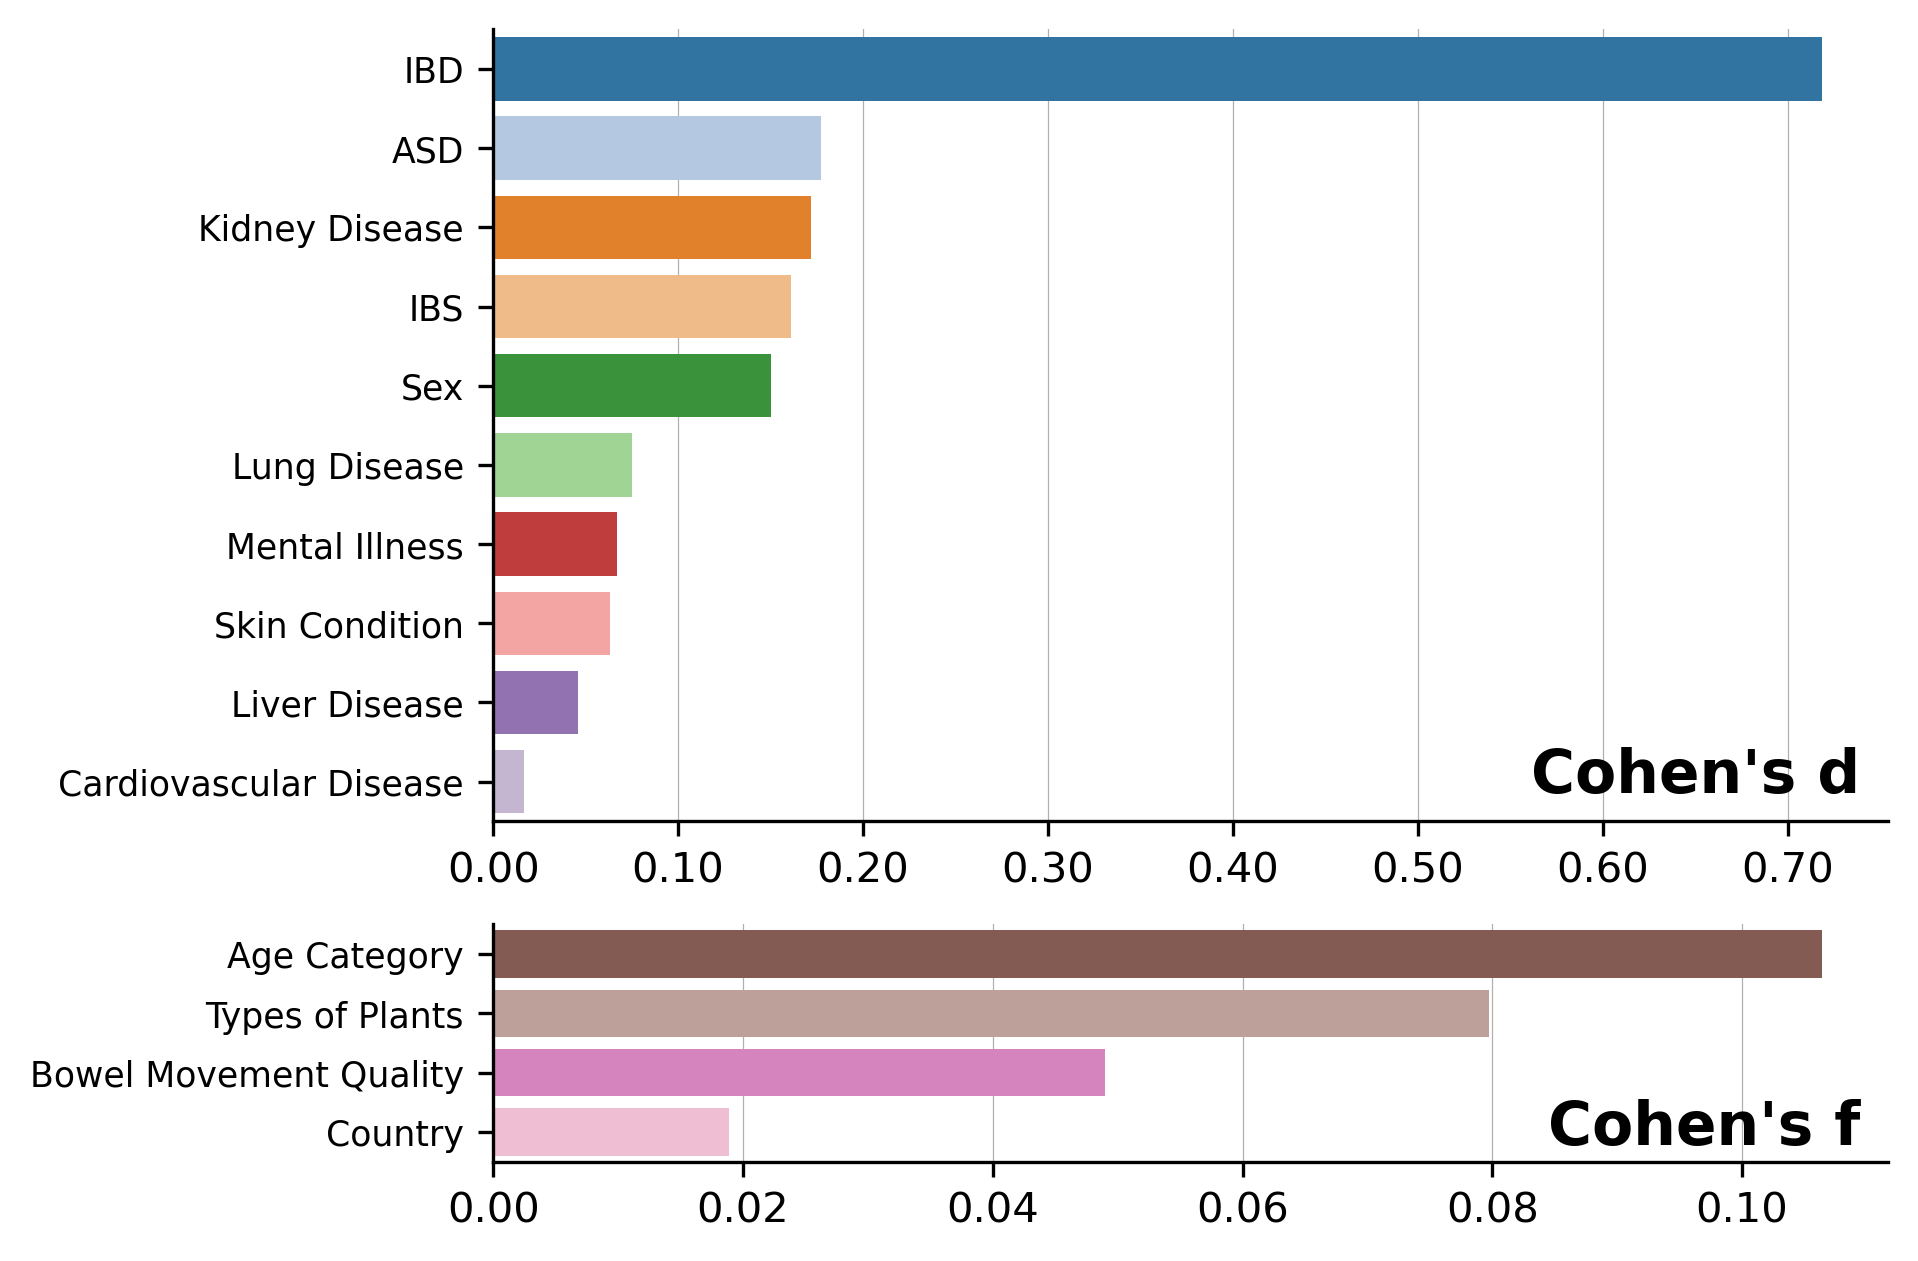

In [8]:
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter

_df_d = es_df.query("metric == 'cohens_d'")
order_d = _df_d["column"]

_df_f = es_df.query("metric == 'cohens_f'")
order_f = _df_f["column"]

num_cols = es_df.shape[0] - 1
height_ratios = [_df_d.shape[0]/num_cols, _df_d.shape[1]/num_cols]

fig = plt.figure(figsize=(6, 5))
gs = GridSpec(ncols=1, nrows=2, height_ratios=height_ratios,
              hspace=0.2)

ax_d = fig.add_subplot(gs[0])
ax_f = fig.add_subplot(gs[1])

bar_args = {"y": "column", "x": "effect_size", "palette": cmap}
text_args = {"x": 0.98, "y": 0.02, "ha": "right", "va": "bottom", "weight": "bold",
             "fontsize": "x-large"}

sns.barplot(**bar_args, data=_df_d, ax=ax_d)
ax_d.set_xlabel("")
ax_d.text(**text_args, s="Cohen's d", transform=ax_d.transAxes)

sns.barplot(**bar_args, data=_df_f, ax=ax_f)
ax_f.text(**text_args, s="Cohen's f", transform=ax_f.transAxes)
ax_f.set_xlabel("")

for ax in [ax_d, ax_f]:
    ax.set_ylabel("")
    ax.grid(axis="x", lw=0.3)
    ax.set_axisbelow(True)
    ax.tick_params("y", labelsize="small")
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))

plt.show()

In [9]:
power_dfs = []

for f in glob.glob("../results/agp/power/*.tsv"):
    _df = pd.read_table(f, sep="\t", index_col=0)
    _df = _df[["alpha", "total_observations", "power", "column", "effect_size", "metric"]]
    power_dfs.append(_df)
    
power_df = (
    pd.concat(power_dfs)
    .reset_index(drop=True)
)
power_df["column"] = power_df["column"].map(col_map)
power_df

,alpha,total_observations,power,column,effect_size,metric
0,0.01,20,0.010324,Liver Disease,0.045602,cohens_d
1,0.05,20,0.051071,Liver Disease,0.045602,cohens_d
2,0.10,20,0.101635,Liver Disease,0.045602,cohens_d
3,0.01,40,0.010714,Liver Disease,0.045602,cohens_d
4,0.05,40,0.052268,Liver Disease,0.045602,cohens_d
...,...,...,...,...,...,...
1045,0.05,480,0.100300,Bowel Movement Quality,0.049001,cohens_f
1046,0.10,480,0.175561,Bowel Movement Quality,0.049001,cohens_f
1047,0.01,500,0.027517,Bowel Movement Quality,0.049001,cohens_f
1048,0.05,500,0.102696,Bowel Movement Quality,0.049001,cohens_f


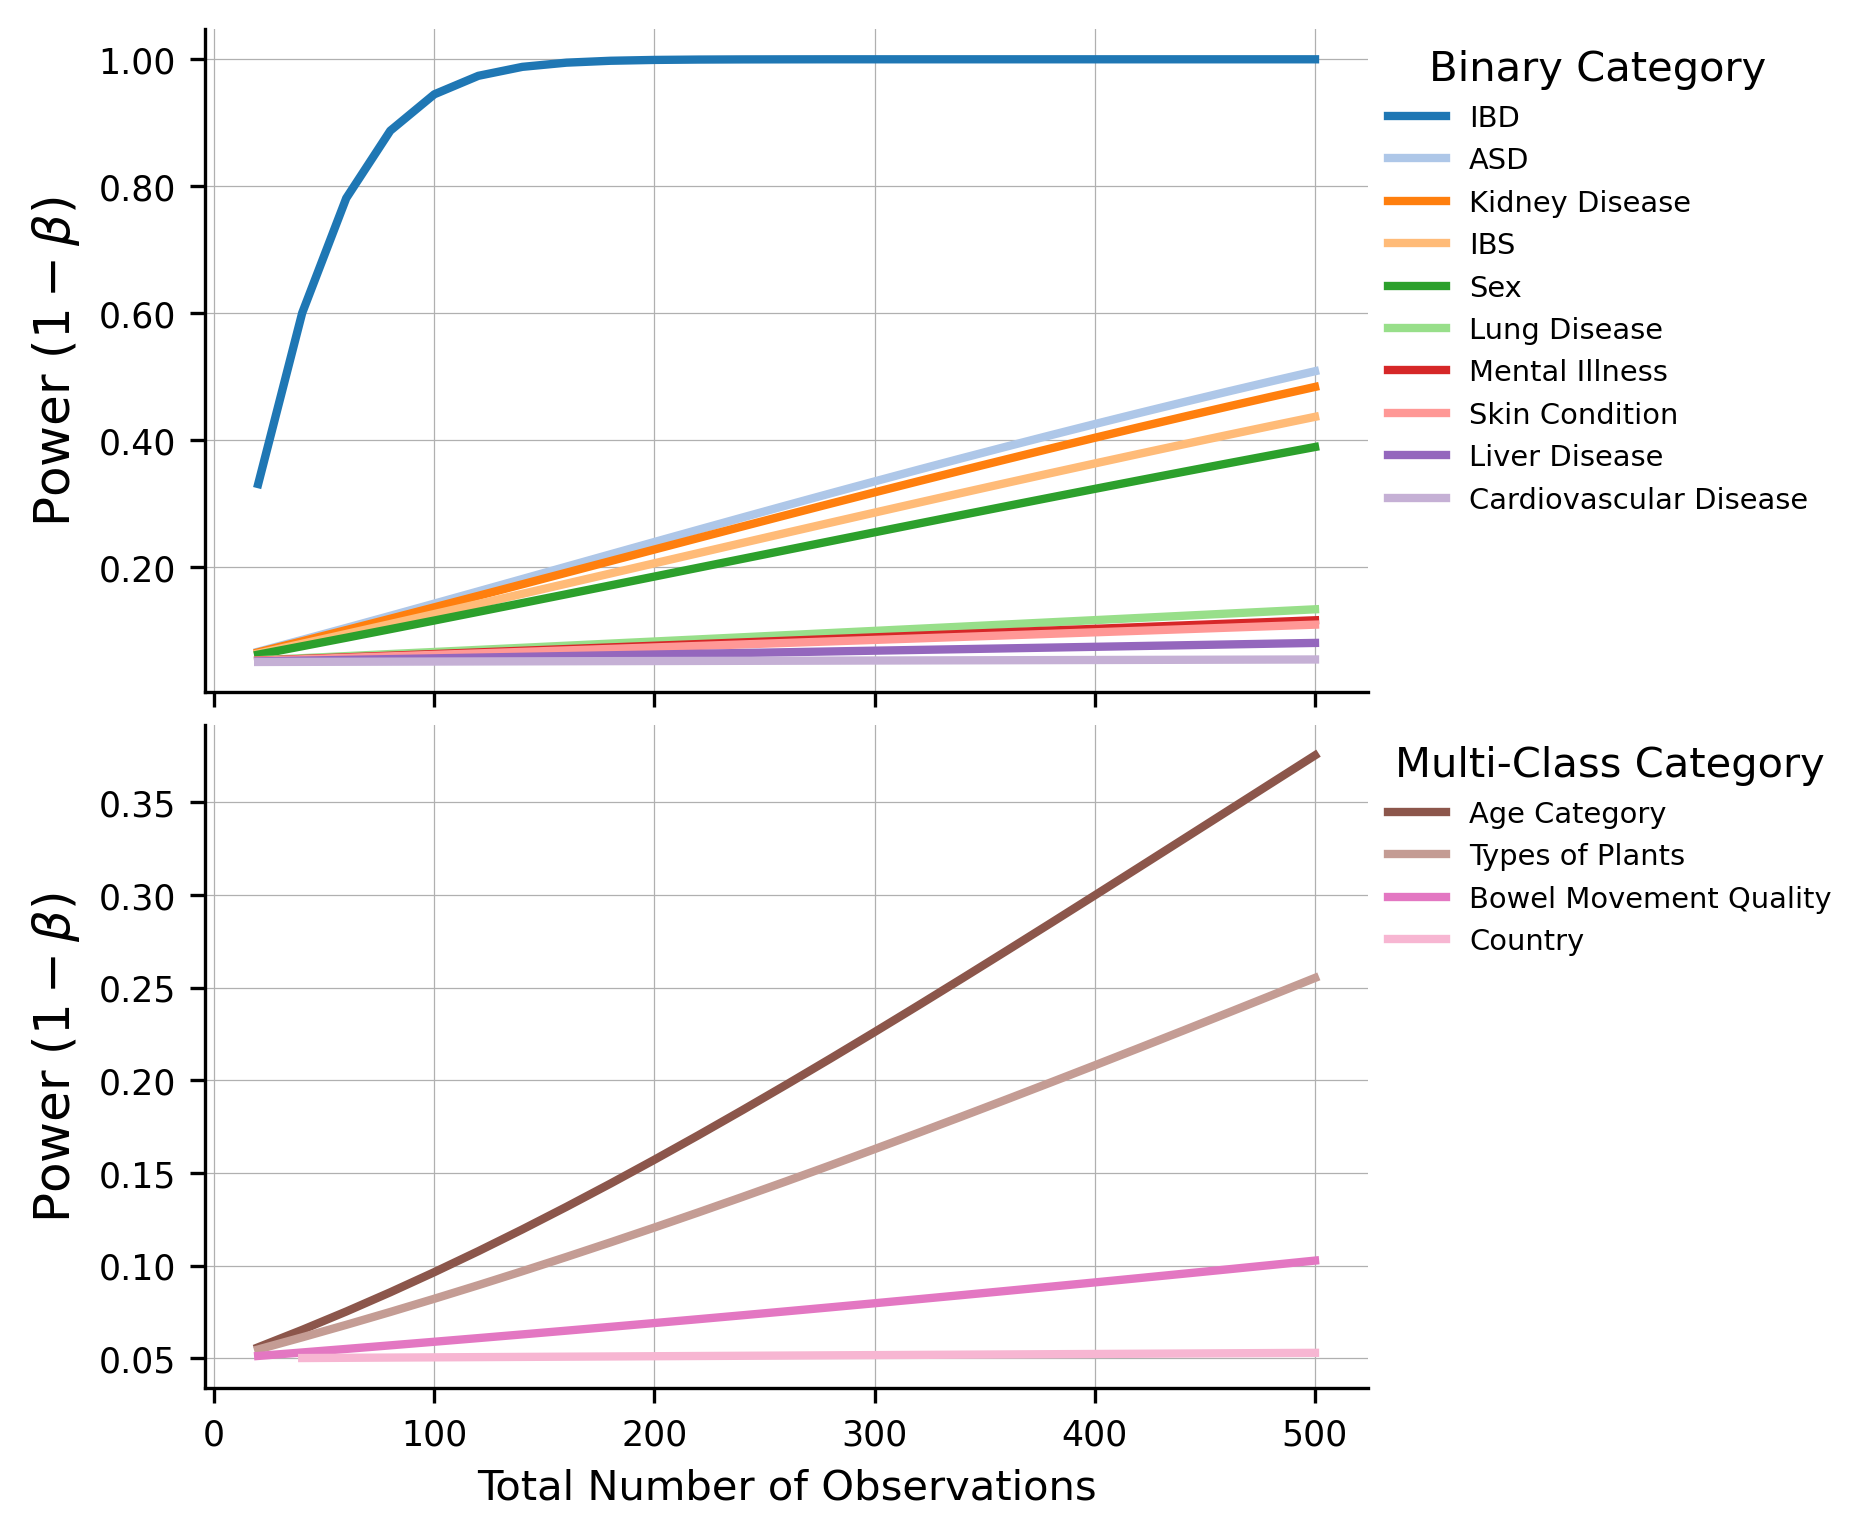

In [10]:
_df_d = power_df.query("metric == 'cohens_d' & alpha == 0.05")
_df_f = power_df.query("metric == 'cohens_f' & alpha == 0.05")

fig = plt.figure(figsize=(5, 6))
gs = GridSpec(ncols=1, nrows=2, hspace=0.05)

ax_d = fig.add_subplot(gs[0])
ax_f = fig.add_subplot(gs[1])

line_args = {"y": "power", "x": "total_observations", "palette": cmap, "hue": "column",
             "lw": 2}
text_args = {"x": 0.98, "y": 0.02, "ha": "right", "va": "bottom", "weight": "bold",
             "fontsize": "x-large"}

sns.lineplot(**line_args, data=_df_d, ax=ax_d, hue_order=order_d)
ax_d.set_xlabel("")
ax_d.set_xticklabels([])

sns.lineplot(**line_args, data=_df_f, ax=ax_f, hue_order=order_f)
ax_f.set_xlabel("Total Number of Observations")

for ax in [ax_d, ax_f]:
    ax.set_ylabel(r"Power $(1 - \beta)$", fontsize="large")
    ax.grid(axis="both", lw=0.3)
    ax.set_axisbelow(True)
    ax.tick_params("both", labelsize="small")
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

# https://stackoverflow.com/a/48296983
leg_args = {"bbox_to_anchor": [1, 1], "loc": "upper left", "fontsize": "x-small",
            "frameon": False, "borderpad": 0.2}

leg_d = ax_d.legend(title="Binary Category", **leg_args)
for line in leg_d.get_lines():
    line.set_linewidth(2)
    
leg_f = ax_f.legend(title="Multi-Class Category", **leg_args)
for line in leg_f.get_lines():
    line.set_linewidth(2)

plt.show()